In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('max.rows', 500)

In [2]:
from pylab import *

cmap = cm.get_cmap('Pastel1', 4)    # PiYG
colors=[]
for i in range(cmap.N):
    rgba = cmap(i)
    # rgb2hex accepts rgb or rgba
    colors.append(matplotlib.colors.rgb2hex(rgba))

In [3]:
def same_as_upper(col:pd.Series)-> pd.Series:
    '''
    Recursively fill NaN rows with the previous value
    '''
    if any(pd.Series(col).isna()):
        col=pd.Series(np.where(col.isna(), col.shift(1), col))
        return same_as_upper(col)
    else:
        return col

In [4]:
df=pd.read_csv('/home/dell/Documents/pacto/reports/black_women/data/rendimento_cor_sexo_brasil.csv')

In [5]:
df = pd.pivot_table(data=df, index=['v2010'], columns=['v2007'])

In [6]:
df.columns=['Homem', 'Mulher']

In [7]:
df.reset_index()

,v2010,Homem,Mulher
0,Amarela,3815.373,3289.569
1,Branca,3574.078,2746.748
2,Ignorado,3707.526,3441.521
3,IndÃ­gena,2333.018,1707.779
4,Negro,2170.485,1771.200


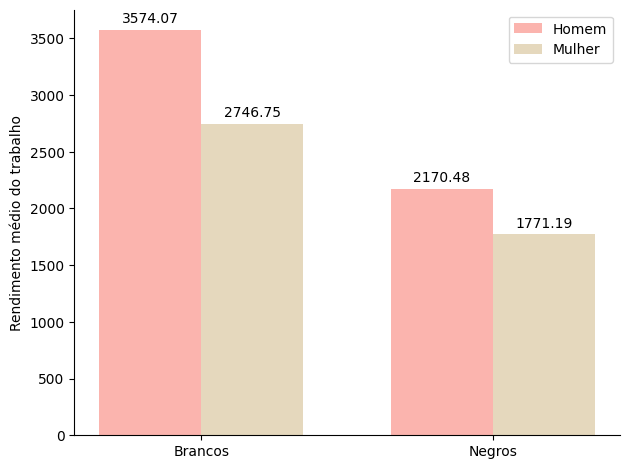

In [8]:
labels = ['Brancos', 'Negros']
men_means = [3574.07, 2170.48]
women_means = [2746.747, 1771.19]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men_means, width, label='Homem', color=colors[0])
rects2 = ax.bar(x + width/2, women_means, width, label='Mulher', color=colors[2])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Rendimento médio do trabalho')
# ax.set_title('Scores by group and gender')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
fig.tight_layout()
fig.savefig('/home/dell/Documents/pacto/reports/black_women/figures/wage_2002_group.pdf', bbox_inches='tight')

plt.show()

In [9]:
2746.74/3574.07

0.7685188034929366

In [10]:
df=pd.read_csv('/home/dell/Documents/pacto/reports/black_women/data/rendimento_cor_regions.csv')

df=df[(df['v2010']=='Branca') | (df['v2010']=='Negro')]
df.reset_index(inplace=True)
df= df[[df.regiao[k] in ['Nordeste', 'Sudeste'] for k in range(len(df))]]
df

,index,v2010,regiao,rendimento
1,6,Branca,Nordeste,2279.483
3,8,Branca,Sudeste,3496.043
6,19,Negro,Nordeste,1601.175
8,21,Negro,Sudeste,2159.300


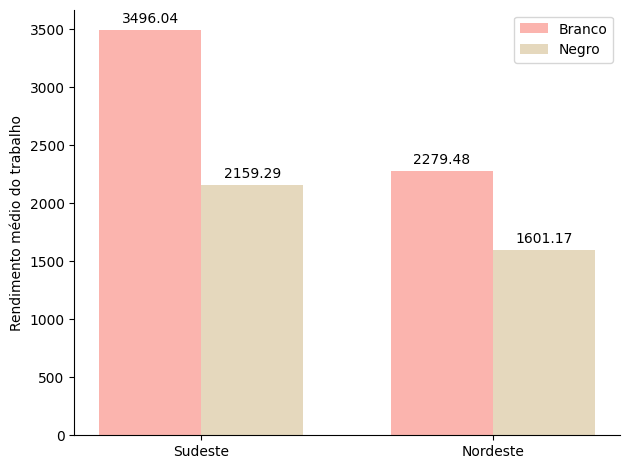

In [11]:
labels = ['Sudeste', 'Nordeste']
white_means = [3496.04,2279.48]
black_means = [2159.29, 1601.17]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, white_means, width, label='Branco', color=colors[0])
rects2 = ax.bar(x + width/2, black_means, width, label='Negro', color=colors[2])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Rendimento médio do trabalho')
# ax.set_title('Scores by group and gender')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
fig.tight_layout()
fig.savefig('/home/dell/Documents/pacto/reports/black_women/figures/wage_2002_region.pdf', bbox_inches='tight')

plt.show()

In [12]:
df=pd.read_csv('/home/dell/Documents/pacto/reports/black_women/data/rendimento_cor_sexo_regions.csv')

df= df[df['v2007']==2]
df=df[(df['v2010']=='Branca') | (df['v2010']=='Negro')]
df.reset_index(inplace=True)
df= df[[df.regiao[k] in ['Nordeste', 'Sudeste'] for k in range(len(df))]]
df

,index,v2007,v2010,regiao,rendimento
1,16,2,Branca,Nordeste,2104.587
3,18,2,Branca,Sudeste,2971.175
6,42,2,Negro,Nordeste,1499.789
8,44,2,Negro,Sudeste,1855.959


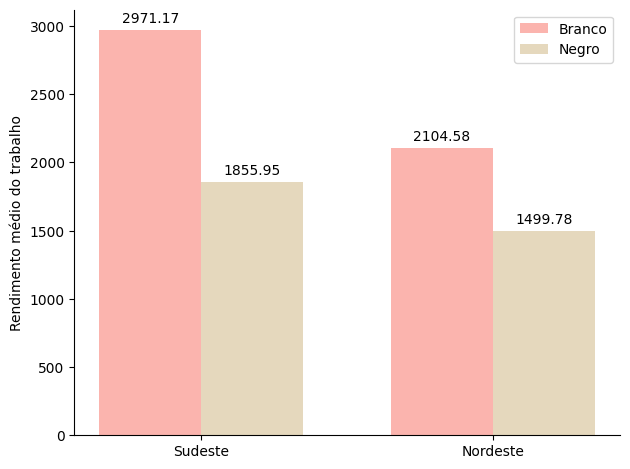

In [13]:
labels = ['Sudeste', 'Nordeste']
white_means = [2971.17,2104.58]
black_means = [1855.95, 1499.78]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, white_means, width, label='Branco',color=colors[0])
rects2 = ax.bar(x + width/2, black_means, width, label='Negro',color=colors[2])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Rendimento médio do trabalho')
# ax.set_title('Scores by group and gender')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
fig.tight_layout()
fig.savefig('/home/dell/Documents/pacto/reports/black_women/figures/wage_2002_region_women.pdf', bbox_inches='tight')

plt.show()

In [14]:
1499.78/2104.58

0.7126267473795247

In [15]:
1855.95/2971.17

0.624652914508426

In [16]:
df=pd.read_csv('/home/dell/Documents/pacto/reports/black_women/data/rendimento_setor.csv')

df=df[(df['v2010']=='Branca') | (df['v2010']=='Negro')]
df.reset_index(inplace=True)

map_ocup={
    1:'Setor Privado',
    2:'Setor Público',
    3:'Doméstico'
}

df['tipo_ocupacao']=df['tipo_ocupacao'].map(map_ocup)

In [17]:
df

,index,v2007,v2010,tipo_ocupacao,wage_mean
0,6,1,Branca,Setor Privado,3158.471
1,7,1,Branca,Setor Público,6092.340
2,8,1,Branca,Doméstico,1377.305
3,9,2,Branca,Setor Privado,2593.521
4,10,2,Branca,Setor Público,4015.481
5,11,2,Branca,Doméstico,1121.835
6,23,1,Negro,Setor Privado,1928.106
7,24,1,Negro,Setor Público,3808.109
8,25,1,Negro,Doméstico,1291.412
9,26,2,Negro,Setor Privado,1689.612


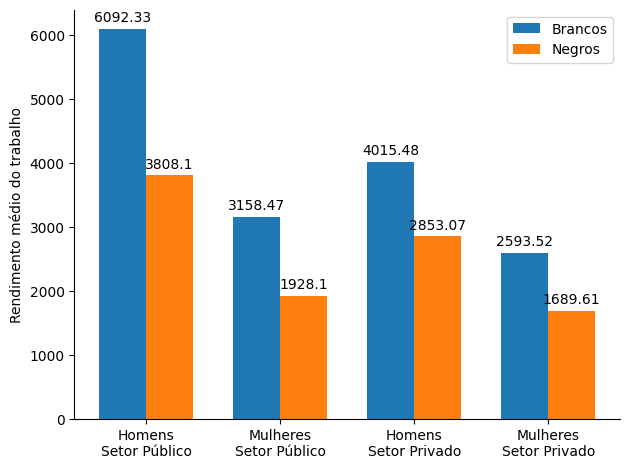

In [18]:
labels = ['Homens\nSetor Público', 'Mulheres\nSetor Público', 
          'Homens\nSetor Privado', 'Mulheres\nSetor Privado']
white_means = [6092.33, 3158.47, 4015.48, 2593.52]
black_means = [3808.10,1928.10,2853.07,1689.61]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, white_means, width, label='Brancos')
rects2 = ax.bar(x + width/2, black_means, width, label='Negros')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Rendimento médio do trabalho')
# ax.set_title('Scores by group and gender')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
fig.tight_layout()

plt.show()

In [19]:
3808.1/6092.33

0.6250646304451662

In [20]:
2853.07/4015.48

0.7105177961289809

In [59]:
df=pd.read_csv('/home/dell/Documents/pacto/reports/black_women/data/participacao_setor.csv')

In [60]:
map_ocup={
    1:'Setor Privado',
    2:'Setor Público',
    3:'Doméstico'
}

df['tipo_ocupacao']=df['tipo_ocupacao'].map(map_ocup)

In [61]:
df

,v2007,v2010,tipo_ocupacao,table1
0,1,Amarela,Setor Privado,165582.929
1,1,Amarela,Setor Público,38541.033
2,1,Amarela,Doméstico,1397.260
3,2,Amarela,Setor Privado,179311.462
4,2,Amarela,Setor Público,57258.494
5,2,Amarela,Doméstico,24455.699
6,1,Branca,Setor Privado,12466747.343
7,1,Branca,Setor Público,2197488.157
8,1,Branca,Doméstico,160501.147
9,2,Branca,Setor Privado,8908132.561


In [23]:
df['prop']=df['table1'] / df.groupby(['v2007','v2010'])['table1'].transform('sum')

In [24]:
groups =[('Branca',1),('Branca',2),('Negro',1),('Negro',2),]

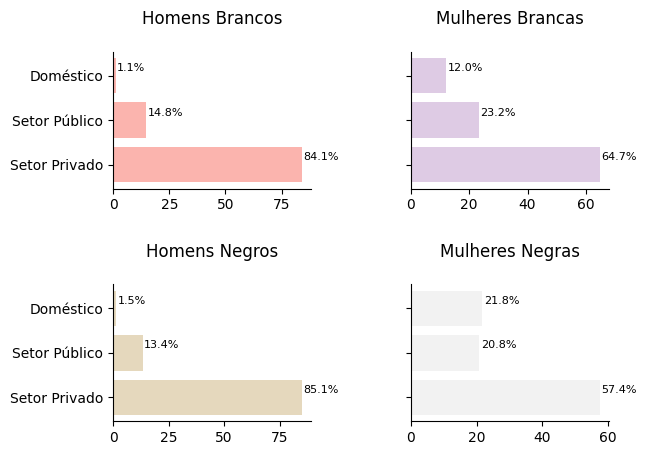

In [25]:
fig, axs = plt.subplots(2,2)
axs = axs.flatten()
for i, group in enumerate(groups):
    race, gender = group
    tab = df[(df['v2010']==race) & (df['v2007']==gender)]
    dict_ocup = dict(zip(tab['tipo_ocupacao'], tab['prop']))

    y=[k for k,v in dict_ocup.items()]
    x=[v*100 for k,v in dict_ocup.items()]

    titles=["Homens Brancos", "Mulheres Brancas", "Homens Negros", "Mulheres Negras"]
    axs[i].barh(y, x, color=colors[i])
    
    if i in [1,3]:
        axs[i].set_yticklabels('')

    # setting label of y-axis
    axs[i].spines.right.set_visible(False)
    axs[i].spines.top.set_visible(False)
    # setting label of x-axis
    # plt.xlabel("")
    axs[i].set_title(titles[i], pad=20)
    
    # plt.ylabel("")
    
for i, ax in enumerate(axs):
    for p in ax.patches:
        ax.annotate(str(round(p.get_width(), 1))+'%', (p.get_width() + 0.5, p.get_y() + 0.5), fontsize=8)
    
fig.subplots_adjust(wspace=0.5, hspace=0.7)

fig.savefig('/home/dell/Documents/pacto/reports/black_women/figures/participation.pdf', bbox_inches='tight')

plt.show()

In [26]:
df=pd.read_csv('/home/dell/Documents/pacto/reports/black_women/data/formal_informal.csv')

df = df[[df['v2010'][k] in ['Branca', 'Negro'] for k in range(len(df))]]

df['graph']=np.where((df['v2007']==1) & (df['v2010']=='Branca'), 'Homem Branco', np.nan)
df['graph']=np.where((df['v2007']==2) & (df['v2010']=='Branca'), 'Mulher Branca', df['graph'])
df['graph']=np.where((df['v2007']==1) & (df['v2010']=='Negro'), 'Homem Negro', df['graph'])
df['graph']=np.where((df['v2007']==2) & (df['v2010']=='Negro'), 'Mulher Negra', df['graph'])

tab = pd.pivot_table(data=df, index='graph', columns='formal', values='table1')
tab=tab.reset_index()
tab.columns=['graph', 'informal','formal']
tab

,graph,informal,formal
0,Homem Branco,10000002.937,11464036.193
1,Homem Negro,15453314.377,13685112.863
2,Mulher Branca,7541958.149,10184046.786
3,Mulher Negra,10534831.534,10053461.131


In [46]:
df=pd.read_csv('/home/dell/Documents/pacto/reports/black_women/data/empregados_desempregados.csv')

df = df[[df['v2010'][k] in ['Branca', 'Negro'] for k in range(len(df))]]

df['graph']=np.where((df['v2007']==1) & (df['v2010']=='Branca'), 'Homem Branco', np.nan)
df['graph']=np.where((df['v2007']==2) & (df['v2010']=='Branca'), 'Mulher Branca', df['graph'])
df['graph']=np.where((df['v2007']==1) & (df['v2010']=='Negro'), 'Homem Negro', df['graph'])
df['graph']=np.where((df['v2007']==2) & (df['v2010']=='Negro'), 'Mulher Negra', df['graph'])

tab2 = pd.pivot_table(data=df, index='graph', columns='vd4002', values='table1')
tab2=tab2.reset_index()
tab2.columns=['graph', 'empregado','desempregado']
tab2

,graph,empregado,desempregado
0,Homem Branco,23310758.906,1534184.509
1,Homem Negro,30583400.244,2944655.205
2,Mulher Branca,19048792.187,1896810.449
3,Mulher Negra,21642163.395,3532326.995


In [47]:
df=tab.set_index('graph').join(tab2.set_index('graph')[['desempregado']])
df.reset_index(inplace=True)
df

,graph,informal,formal,desempregado
0,Homem Branco,10000002.937,11464036.193,1534184.509
1,Homem Negro,15453314.377,13685112.863,2944655.205
2,Mulher Branca,7541958.149,10184046.786,1896810.449
3,Mulher Negra,10534831.534,10053461.131,3532326.995


In [48]:
np.arange(len(df))

array([0, 1, 2, 3])

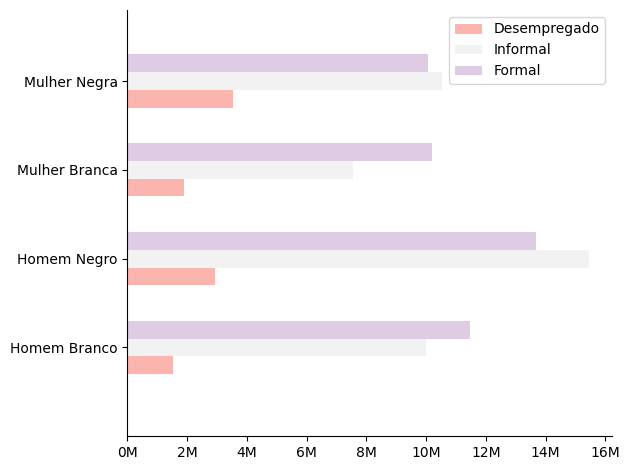

In [49]:
ind = np.arange(len(df))
width = 0.2

fig, ax = plt.subplots()
ax.barh(ind, df['desempregado'], width, color=colors[0], label='Desempregado')
ax.barh(ind + width, df['informal'], width, color=colors[3], label='Informal')
ax.barh(ind + 2*width, df['formal'], width, color=colors[1], label='Formal')

ax.set(yticks=ind + width, yticklabels=df.graph, ylim=[width - 1, len(df)])
ax.legend()

# format xticks labels to show millions with a M (e.g. 1M)
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, pos: '{:,.0f}M'.format(x*1e-6)))

ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
fig.tight_layout()

fig.savefig('/home/dell/Documents/pacto/reports/black_women/figures/emprego.pdf', bbox_inches='tight')

plt.show()

In [54]:
df

,graph,informal,formal,desempregado
0,Homem Branco,10000002.937,11464036.193,1534184.509
1,Homem Negro,15453314.377,13685112.863,2944655.205
2,Mulher Branca,7541958.149,10184046.786,1896810.449
3,Mulher Negra,10534831.534,10053461.131,3532326.995


In [58]:
df[['formal', 'informal']].sum(axis=1)

0   21464039.130
1   29138427.240
2   17726004.936
3   20588292.666
dtype: float64

In [55]:
df['desempregado'].sum()/df[['formal', 'informal']].sum(axis=1).sum()

0.11142979924408598

In [56]:
def get_unemp(index):
    emp = dict(df.iloc[index])
    return emp['desempregado']/(emp['informal']+emp['formal'])

[get_unemp(k) for k in df.index]

[0.0714769713090875,
 0.10105745175420107,
 0.10700721658792828,
 0.17156969024314467]

In [57]:
def get_unemp(index):
    emp = dict(df.iloc[index])
    return emp['informal']/(emp['informal']+emp['formal'])

[get_unemp(k) for k in df.index]

[0.46589567211569216,
 0.5303414027703749,
 0.42547422144476227,
 0.5116903915006651]

In [35]:
df=pd.read_csv('/home/dell/Documents/pacto/reports/black_women/data/anos_escolaridade.csv')
df = df[[df['v2010'][k] in ['Branca', 'Negro'] for k in range(len(df))]]
df['group']=np.where((df['v2007']==1) & (df['v2010']=='Branca'), 'Homem Branco', np.nan)
df['group']=np.where((df['v2007']==2) & (df['v2010']=='Branca'), 'Mulher Branca', df['group'])
df['group']=np.where((df['v2007']==1) & (df['v2010']=='Negro'), 'Homem Negro', df['group'])
df['group']=np.where((df['v2007']==2) & (df['v2010']=='Negro'), 'Mulher Negra', df['group'])

In [36]:
df=pd.pivot_table(data=df, index='vd3005', columns=['group'], values='table1')

In [37]:
cols=df.columns
df[cols] = df[cols].div(df[cols].sum(axis=0), axis=1).multiply(100)

In [38]:
df

group,Homem Branco,Homem Negro,Mulher Branca,Mulher Negra
vd3005,,,,
0,2.081,4.340,1.842,3.402
1,0.880,1.660,0.686,1.269
2,0.664,1.465,0.497,1.051
3,0.927,2.097,0.851,1.625
4,1.496,2.746,1.352,2.143
5,4.842,6.206,4.404,5.435
6,3.681,5.219,3.089,4.346
7,2.955,4.276,2.347,3.609
8,4.117,5.992,3.423,5.455


In [39]:
df['Homem Branco'] = df['Homem Branco']*(-1)
df['Homem Negro'] = df['Homem Negro']*(-1)

In [40]:
df.reset_index(inplace=True)

In [41]:
df

group,vd3005,Homem Branco,Homem Negro,Mulher Branca,Mulher Negra
0,0,-2.081,-4.340,1.842,3.402
1,1,-0.880,-1.660,0.686,1.269
2,2,-0.664,-1.465,0.497,1.051
3,3,-0.927,-2.097,0.851,1.625
4,4,-1.496,-2.746,1.352,2.143
5,5,-4.842,-6.206,4.404,5.435
6,6,-3.681,-5.219,3.089,4.346
7,7,-2.955,-4.276,2.347,3.609
8,8,-4.117,-5.992,3.423,5.455
9,9,-8.814,-9.763,7.740,9.042


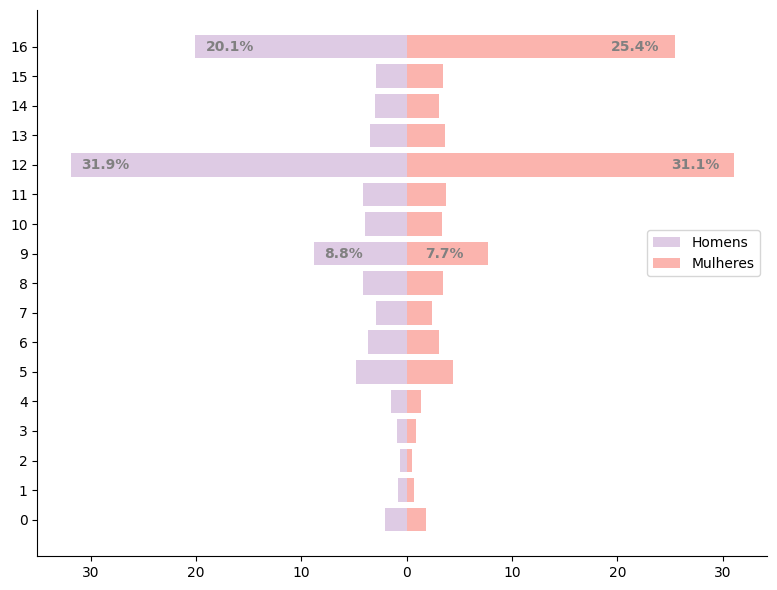

In [42]:
fig, ax = plt.subplots(figsize=(8,6))
ax.barh(df['vd3005'], df['Homem Branco'], color=colors[1], label='Homens')
ax.barh(df['vd3005'], df['Mulher Branca'],color=colors[0], label='Mulheres')

# add format percentage to bars
for i, v in enumerate(df['Homem Branco']):
    if i in [9,12,16]:
        ax.text(v+1, i-0.15, str(round(abs(v),1))+'%', color='gray', fontweight='bold')
        
for i, v in enumerate(df['Mulher Branca']):
    if i in [9,12,16]:
        ax.text(v-6, i - .15, str(round(v,1))+'%', color='gray', fontweight='bold')

ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
fig.tight_layout()
ax.legend(loc='lower right', bbox_to_anchor=(1, 0.5))


ax.set_yticks(range(0, len(df['vd3005'])))
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, pos: '{:,.0f}'.format(abs(x))))


fig.savefig('/home/dell/Documents/pacto/reports/black_women/figures/schooling_white.pdf', bbox_inches='tight')

plt.show()

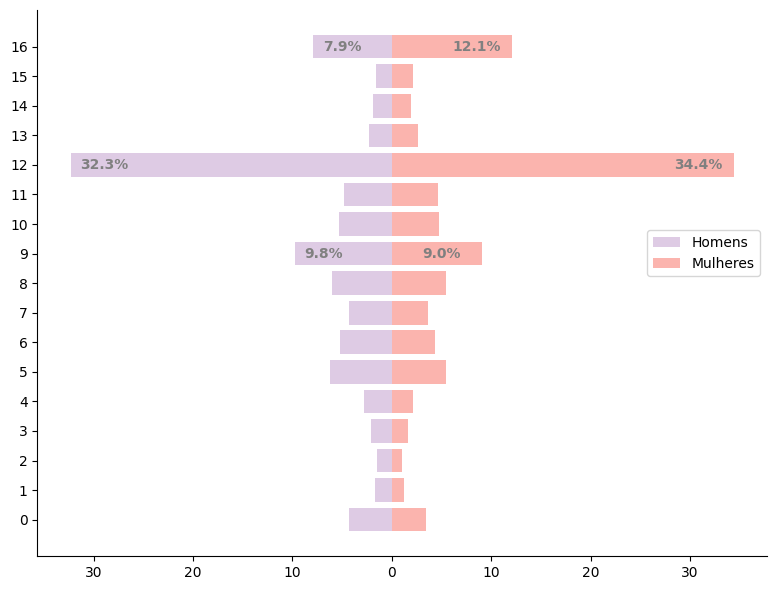

In [43]:
fig, ax = plt.subplots(figsize=(8,6))
ax.barh(df['vd3005'], df['Homem Negro'], color=colors[1], label='Homens')
ax.barh(df['vd3005'], df['Mulher Negra'],color=colors[0], label='Mulheres')

# add format percentage to bars
for i, v in enumerate(df['Homem Negro']):
    if i in [9,12,16]:
        ax.text(v+1, i-0.15, str(round(abs(v),1))+'%', color='gray', fontweight='bold')
        
for i, v in enumerate(df['Mulher Negra']):
    if i in [9,12,16]:
        ax.text(v-6, i - .15, str(round(v,1))+'%', color='gray', fontweight='bold')

ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
fig.tight_layout()

ax.set_yticks(range(0, len(df['vd3005'])))
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, pos: '{:,.0f}'.format(abs(x))))
ax.legend(loc='lower right', bbox_to_anchor=(1, 0.5))


fig.savefig('/home/dell/Documents/pacto/reports/black_women/figures/schooling_black.pdf', bbox_inches='tight')

plt.show()